# Solving the Laplace Equation for a Rectangular Box with Sinusoidal Boundary Conditions Using Fourier Series

## System Description

The system under investigation is a two-dimensional rectangular box with dimensions $a \times b$, where the electric potential is governed by the Laplace equation. The boundaries of the box are held at different potentials:

- The boundary at $x = 0$ is grounded, meaning the potential $V(0, y) = 0$.
- The boundary at $x = b$ is held at a sinusoidal potential described by $V(b, y) = V_0 (y)$.
- The boundary at $y = 0$ is grounded, $V(x, 0) = 0$.
- The boundary at $y = a$ is also grounded, so $V(x, a) = 0$.

This setup introduces complexity due to the non-constant potential on the boundary at $x = b$, necessitating the use of Fourier series techniques to find the potential $V(x, y)$ inside the box. 

The parameters in this problem are:
- $a$ and $b$: the dimensions of the box,
- $V_0$: the amplitude of the sinusoidal potential on the boundary at $y = b$,
- $x$ and $y$: the coordinates inside the box where we aim to find the potential.


## Explanation of the Approach

We are solving for the electric potential $V(x,y)$ inside the box, assuming that the system is governed by the two-dimensional Laplace equation. The reason for solving this problem analytically is that it allows us to understand the behavior of the potential in a complex setup involving sinusoidal boundary conditions. The sinusoidal boundary condition along $x=b$ requires Fourier series expansion, which introduces a summation over harmonic terms, making this problem non-trivial.

We will use the method of separation of variables to reduce the Laplace equation into simpler ordinary differential equations for $x$ and $y$, and then apply Fourier’s trick to handle the non-constant boundary condition at $x=b$. This method is a powerful tool for solving partial differential equations with non-constant boundary conditions, and it gives us a clear path to constructing the full solution.

## Analytical Solution

**Attached at the end of the PDF file**

In the end, we get the following expression for the potential:

$$
V(x, y) = \frac{4V_0}{\pi} \sum_{2n+1}^{\infty}\frac{\sinh(\frac{n\pi x}{a})\sin(\frac{n\pi y}{a})}{n \sinh(\frac{n\pi b}{a})}
$$

### Analyzing Limits of our Solution

**Case 1**: when $x = b$, $V(x, y) =  \frac{4V_0}{\pi} \sum_{2n+1}^{\infty}\sin(\frac{n\pi y}{a})$. This implies, $V(x, y) = V_0 (y)$, as mentioned in the boundary condition.

**Case 2:** when $y = 0, a$, $V(x, y) = 0$, which is also mentioned in the boundary conditions.

**Case 3:** when $x = 0$, $V(x, y) = 0$, which, again, also satisfies our boundary conditions.

*Since our solution satisfies all our boundary solution, we can confidently say this is the correct solution for the potential of our system.*

## Visualizing the Potential

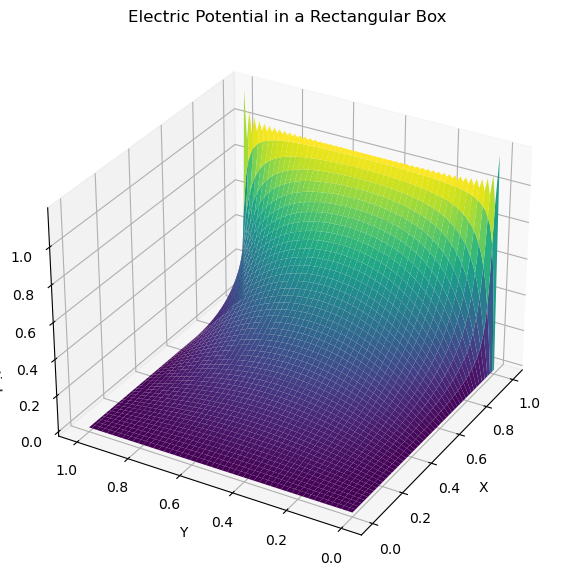

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
a = 1.0  # Box width
b = 1.0  # Box height
V0 = 1.0  # Amplitude of the sinusoidal potential
terms = 50  # Number of Fourier terms to sum
steps = 100  # Resolution of the grid

# Set up the space
x_range = np.linspace(0, a, steps)
y_range = np.linspace(0, b, steps)

# Create a mesh grid for the potential
X, Y = np.meshgrid(x_range, y_range)

# Function to calculate the potential at each (x, y) point
def electric_potential(x, y, terms=50):
    phi = 0.0
    # Summing the Fourier series
    for i in range(terms):
        n = 2*i+1
        phi += np.sin(n * np.pi * y / a) * np.sinh(n * np.pi * x / a) /(n * np.sinh(n * np.pi * b / a))
    return 4*V0*phi/np.pi

# Calculate the potential on the mesh grid
Z = electric_potential(X, Y, terms=terms)

# Create a 3D plot of the electric potential
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set plot labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Electric Potential')

# Set viewing angle
ax.view_init(30, 210)

# Show plot
plt.title('Electric Potential in a Rectangular Box')
plt.show()

## References

- The problem is taken from *Introduction to Electrodynamics, David J. Griffiths*, (Problem 3.15)

- The code to visualize the potential is taken directly from the in-class activity - PDEs and Separation of Variables - Solved. I modified the electric potential function to reflect the current system.